# Natural Language Processing (NLP) Tutorial with Python & NLTK

Credit: https://www.youtube.com/watch?v=X2vAabgKiuM

In [1]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.
%matplotlib inline
### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.18.04.15).
python3-tk is already the newest version (3.6.9-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
import os
import nltk
import nltk.corpus

# Corpora
A group of texts is called a **corpus**. NLTK provides several **corpora** covering everything from novels hosted by ***Project Gutenberg*** to inaugural speeches by presidents of the United States.

In order to analyze texts in NLTK, you first need to import them. This requires **nltk.download("book")**, which is a pretty big download:

In [3]:
nltk.download('book')
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

In [4]:
print(os.listdir(nltk.data.find("corpora")))

['inaugural.zip', 'senseval.zip', 'udhr2', 'words', 'movie_reviews', 'wordnet_ic', 'state_union.zip', 'ieer', 'chat80', 'panlex_swadesh.zip', 'wordnet.zip', 'udhr.zip', 'genesis', 'abc.zip', 'names.zip', 'conll2002.zip', 'nps_chat', 'swadesh', 'conll2000.zip', 'webtext.zip', 'timit', 'ppattach.zip', 'webtext', 'treebank', 'movie_reviews.zip', 'abc', 'stopwords', 'gutenberg', 'dependency_treebank.zip', 'udhr2.zip', 'stopwords.zip', 'words.zip', 'inaugural', 'conll2000', 'nps_chat.zip', 'chat80.zip', 'gutenberg.zip', 'genesis.zip', 'udhr', 'cmudict.zip', 'names', 'treebank.zip', 'unicode_samples', 'ieer.zip', 'state_union', 'cmudict', 'conll2002', 'toolbox.zip', 'city_database.zip', 'wordnet_ic.zip', 'city_database', 'dependency_treebank', 'ppattach', 'brown.zip', 'toolbox', 'unicode_samples.zip', 'reuters.zip', 'wordnet', 'senseval', 'swadesh.zip', 'brown', 'timit.zip']


In [5]:
from nltk.corpus import brown
brown.words
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [6]:
from nltk.corpus import gutenberg
gutenberg.fileids
gutenberg.fileids()


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
hamlet = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')
hamlet

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', ...]

In [8]:
len(hamlet)

37360

In [9]:
# the story from the 'shakespeare-hamlet.txt'
for word in hamlet[:500]:
  print(word, sep=' ', end=' ')

[ The Tragedie of Hamlet by William Shakespeare 1599 ] Actus Primus . Scoena Prima . Enter Barnardo and Francisco two Centinels . Barnardo . Who ' s there ? Fran . Nay answer me : Stand & vnfold your selfe Bar . Long liue the King Fran . Barnardo ? Bar . He Fran . You come most carefully vpon your houre Bar . ' Tis now strook twelue , get thee to bed Francisco Fran . For this releefe much thankes : ' Tis bitter cold , And I am sicke at heart Barn . Haue you had quiet Guard ? Fran . Not a Mouse stirring Barn . Well , goodnight . If you do meet Horatio and Marcellus , the Riuals of my Watch , bid them make hast . Enter Horatio and Marcellus . Fran . I thinke I heare them . Stand : who ' s there ? Hor . Friends to this ground Mar . And Leige - men to the Dane Fran . Giue you good night Mar . O farwel honest Soldier , who hath relieu ' d you ? Fra . Barnardo ha ' s my place : giue you goodnight . Exit Fran . Mar . Holla Barnardo Bar . Say , what is Horatio there ? Hor . A peece of him Bar 

In [10]:
AI = """According to the father of Artificial Intelligence, John McCarthy, it is “The science and engineering of making intelligent machines, especially intelligent computer programs”.

Artificial Intelligence is a way of making a computer, a computer-controlled robot, or a software think intelligently, in a similar manner the intelligent humans think.

AI is accomplished by studying how human brain thinks, and how humans learn, decide, and work while trying to solve a problem, and then using the outcomes of this study as a basis of developing intelligent software and systems. What is AI?
The theory and development of computer systems able to perform tasks normally requiring human intelligence, such as visual perception, speech recognition, decision-making, and translation between languages.
AlphaGo is a narrow AI computer program developed by Alphabet Inc.’s Google DeepMind in London to play the board game Go. AlphaGO has won against human champions on the game Go.
"""

In [11]:
type(AI)

str

In [12]:
from nltk.tokenize import word_tokenize
AI_token = word_tokenize(AI)
AI_token

['According',
 'to',
 'the',
 'father',
 'of',
 'Artificial',
 'Intelligence',
 ',',
 'John',
 'McCarthy',
 ',',
 'it',
 'is',
 '“',
 'The',
 'science',
 'and',
 'engineering',
 'of',
 'making',
 'intelligent',
 'machines',
 ',',
 'especially',
 'intelligent',
 'computer',
 'programs',
 '”',
 '.',
 'Artificial',
 'Intelligence',
 'is',
 'a',
 'way',
 'of',
 'making',
 'a',
 'computer',
 ',',
 'a',
 'computer-controlled',
 'robot',
 ',',
 'or',
 'a',
 'software',
 'think',
 'intelligently',
 ',',
 'in',
 'a',
 'similar',
 'manner',
 'the',
 'intelligent',
 'humans',
 'think',
 '.',
 'AI',
 'is',
 'accomplished',
 'by',
 'studying',
 'how',
 'human',
 'brain',
 'thinks',
 ',',
 'and',
 'how',
 'humans',
 'learn',
 ',',
 'decide',
 ',',
 'and',
 'work',
 'while',
 'trying',
 'to',
 'solve',
 'a',
 'problem',
 ',',
 'and',
 'then',
 'using',
 'the',
 'outcomes',
 'of',
 'this',
 'study',
 'as',
 'a',
 'basis',
 'of',
 'developing',
 'intelligent',
 'software',
 'and',
 'systems',
 '.',
 'W

In [13]:
len(AI_token)

172

# Frequency testing

In [14]:
from nltk.probability import FreqDist
fdist = FreqDist()
fdist

FreqDist()

In [15]:
for word in AI_token:
  fdist[word.lower()]+=1
fdist

FreqDist({',': 14,
          '.': 6,
          '?': 1,
          'a': 8,
          'able': 1,
          'accomplished': 1,
          'according': 1,
          'against': 1,
          'ai': 3,
          'alphabet': 1,
          'alphago': 2,
          'and': 7,
          'artificial': 2,
          'as': 2,
          'basis': 1,
          'between': 1,
          'board': 1,
          'brain': 1,
          'by': 2,
          'champions': 1,
          'computer': 4,
          'computer-controlled': 1,
          'decide': 1,
          'decision-making': 1,
          'deepmind': 1,
          'developed': 1,
          'developing': 1,
          'development': 1,
          'engineering': 1,
          'especially': 1,
          'father': 1,
          'game': 2,
          'go': 2,
          'google': 1,
          'has': 1,
          'how': 2,
          'human': 3,
          'humans': 2,
          'in': 2,
          'inc.': 1,
          'intelligence': 3,
          'intelligent': 4,
          'in

In [16]:
fdist['artificial'] # specific word frequency

2

In [17]:
len(fdist)

98

In [18]:
fdist_top10 = fdist.most_common(10)
fdist_top10

[(',', 14),
 ('a', 8),
 ('the', 7),
 ('and', 7),
 ('of', 6),
 ('.', 6),
 ('is', 5),
 ('to', 4),
 ('intelligent', 4),
 ('computer', 4)]

In [19]:
from nltk.tokenize import blankline_tokenize
AI_blankword = blankline_tokenize(AI)
len(AI_blankword)

3

In [20]:
AI_blankword[2]

'AI is accomplished by studying how human brain thinks, and how humans learn, decide, and work while trying to solve a problem, and then using the outcomes of this study as a basis of developing intelligent software and systems. What is AI?\nThe theory and development of computer systems able to perform tasks normally requiring human intelligence, such as visual perception, speech recognition, decision-making, and translation between languages.\nAlphaGo is a narrow AI computer program developed by Alphabet Inc.’s Google DeepMind in London to play the board game Go. AlphaGO has won against human champions on the game Go.\n'

# Tokenization
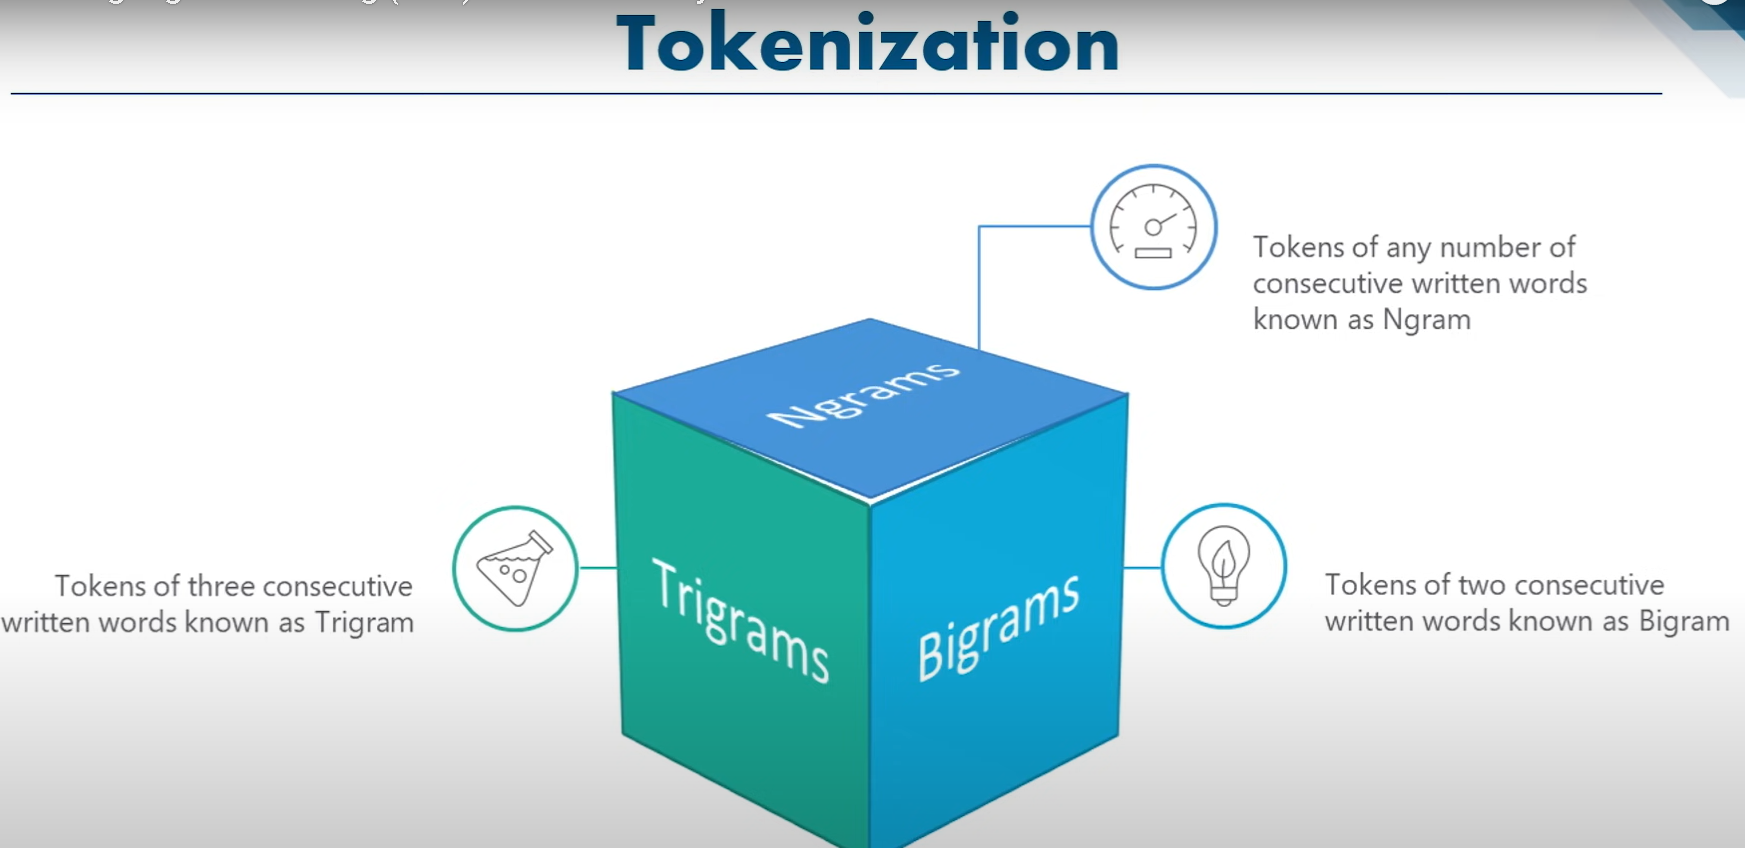

In [21]:
from nltk.util import bigrams, trigrams, ngrams

string = """AI is accomplished by studying how human brain thinks, and how humans learn, decide, and work while trying to solve a problem, and then using the outcomes of this study as a basis of developing intelligent software and systems. What is AI?
The theory and development of computer systems able to perform tasks normally requiring human intelligence, such as visual perception, speech recognition, decision-making, and translation between languages.
AlphaGo is a narrow AI computer program developed by Alphabet Inc.’s Google DeepMind in London to play the board game Go. AlphaGO has won against human champions on the game Go.
"""

In [22]:
quote_token = nltk.word_tokenize(string)
quote_token

['AI',
 'is',
 'accomplished',
 'by',
 'studying',
 'how',
 'human',
 'brain',
 'thinks',
 ',',
 'and',
 'how',
 'humans',
 'learn',
 ',',
 'decide',
 ',',
 'and',
 'work',
 'while',
 'trying',
 'to',
 'solve',
 'a',
 'problem',
 ',',
 'and',
 'then',
 'using',
 'the',
 'outcomes',
 'of',
 'this',
 'study',
 'as',
 'a',
 'basis',
 'of',
 'developing',
 'intelligent',
 'software',
 'and',
 'systems',
 '.',
 'What',
 'is',
 'AI',
 '?',
 'The',
 'theory',
 'and',
 'development',
 'of',
 'computer',
 'systems',
 'able',
 'to',
 'perform',
 'tasks',
 'normally',
 'requiring',
 'human',
 'intelligence',
 ',',
 'such',
 'as',
 'visual',
 'perception',
 ',',
 'speech',
 'recognition',
 ',',
 'decision-making',
 ',',
 'and',
 'translation',
 'between',
 'languages',
 '.',
 'AlphaGo',
 'is',
 'a',
 'narrow',
 'AI',
 'computer',
 'program',
 'developed',
 'by',
 'Alphabet',
 'Inc.',
 '’',
 's',
 'Google',
 'DeepMind',
 'in',
 'London',
 'to',
 'play',
 'the',
 'board',
 'game',
 'Go',
 '.',
 'Alp

In [23]:
quote_bigrams = list(nltk.bigrams(quote_token))
quote_bigrams

[('AI', 'is'),
 ('is', 'accomplished'),
 ('accomplished', 'by'),
 ('by', 'studying'),
 ('studying', 'how'),
 ('how', 'human'),
 ('human', 'brain'),
 ('brain', 'thinks'),
 ('thinks', ','),
 (',', 'and'),
 ('and', 'how'),
 ('how', 'humans'),
 ('humans', 'learn'),
 ('learn', ','),
 (',', 'decide'),
 ('decide', ','),
 (',', 'and'),
 ('and', 'work'),
 ('work', 'while'),
 ('while', 'trying'),
 ('trying', 'to'),
 ('to', 'solve'),
 ('solve', 'a'),
 ('a', 'problem'),
 ('problem', ','),
 (',', 'and'),
 ('and', 'then'),
 ('then', 'using'),
 ('using', 'the'),
 ('the', 'outcomes'),
 ('outcomes', 'of'),
 ('of', 'this'),
 ('this', 'study'),
 ('study', 'as'),
 ('as', 'a'),
 ('a', 'basis'),
 ('basis', 'of'),
 ('of', 'developing'),
 ('developing', 'intelligent'),
 ('intelligent', 'software'),
 ('software', 'and'),
 ('and', 'systems'),
 ('systems', '.'),
 ('.', 'What'),
 ('What', 'is'),
 ('is', 'AI'),
 ('AI', '?'),
 ('?', 'The'),
 ('The', 'theory'),
 ('theory', 'and'),
 ('and', 'development'),
 ('develop

In [24]:
quote_trigrams = list(nltk.trigrams(quote_token))
quote_trigrams

[('AI', 'is', 'accomplished'),
 ('is', 'accomplished', 'by'),
 ('accomplished', 'by', 'studying'),
 ('by', 'studying', 'how'),
 ('studying', 'how', 'human'),
 ('how', 'human', 'brain'),
 ('human', 'brain', 'thinks'),
 ('brain', 'thinks', ','),
 ('thinks', ',', 'and'),
 (',', 'and', 'how'),
 ('and', 'how', 'humans'),
 ('how', 'humans', 'learn'),
 ('humans', 'learn', ','),
 ('learn', ',', 'decide'),
 (',', 'decide', ','),
 ('decide', ',', 'and'),
 (',', 'and', 'work'),
 ('and', 'work', 'while'),
 ('work', 'while', 'trying'),
 ('while', 'trying', 'to'),
 ('trying', 'to', 'solve'),
 ('to', 'solve', 'a'),
 ('solve', 'a', 'problem'),
 ('a', 'problem', ','),
 ('problem', ',', 'and'),
 (',', 'and', 'then'),
 ('and', 'then', 'using'),
 ('then', 'using', 'the'),
 ('using', 'the', 'outcomes'),
 ('the', 'outcomes', 'of'),
 ('outcomes', 'of', 'this'),
 ('of', 'this', 'study'),
 ('this', 'study', 'as'),
 ('study', 'as', 'a'),
 ('as', 'a', 'basis'),
 ('a', 'basis', 'of'),
 ('basis', 'of', 'developing

In [25]:
quote_ngrams = list(nltk.ngrams(quote_token, 5))
quote_ngrams

[('AI', 'is', 'accomplished', 'by', 'studying'),
 ('is', 'accomplished', 'by', 'studying', 'how'),
 ('accomplished', 'by', 'studying', 'how', 'human'),
 ('by', 'studying', 'how', 'human', 'brain'),
 ('studying', 'how', 'human', 'brain', 'thinks'),
 ('how', 'human', 'brain', 'thinks', ','),
 ('human', 'brain', 'thinks', ',', 'and'),
 ('brain', 'thinks', ',', 'and', 'how'),
 ('thinks', ',', 'and', 'how', 'humans'),
 (',', 'and', 'how', 'humans', 'learn'),
 ('and', 'how', 'humans', 'learn', ','),
 ('how', 'humans', 'learn', ',', 'decide'),
 ('humans', 'learn', ',', 'decide', ','),
 ('learn', ',', 'decide', ',', 'and'),
 (',', 'decide', ',', 'and', 'work'),
 ('decide', ',', 'and', 'work', 'while'),
 (',', 'and', 'work', 'while', 'trying'),
 ('and', 'work', 'while', 'trying', 'to'),
 ('work', 'while', 'trying', 'to', 'solve'),
 ('while', 'trying', 'to', 'solve', 'a'),
 ('trying', 'to', 'solve', 'a', 'problem'),
 ('to', 'solve', 'a', 'problem', ','),
 ('solve', 'a', 'problem', ',', 'and'),
 

# Stemming, make base form of word

In [26]:
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem('having')

'have'

In [27]:
words_to_stem = ['give', 'giving', 'given', 'gave']

for word in words_to_stem:
  print(word+ ':' +pst.stem(word))

give:give
giving:give
given:given
gave:gave


In [28]:
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
lst.stem('having')

'hav'

In [29]:
words_to_stem = ['give', 'giving', 'given', 'gave']

for word in words_to_stem:
  print(word+ ':' +lst.stem(word))

give:giv
giving:giv
given:giv
gave:gav


In [30]:
from nltk.stem import SnowballStemmer
sbst = SnowballStemmer('english')
sbst.stem('having')

'have'

In [31]:
words_to_stem = ['give', 'giving', 'given', 'gave']

for word in words_to_stem:
  print(word+ ':' +sbst.stem(word))

give:give
giving:give
given:given
gave:gave


# Lemmatization

In [32]:
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer

word_lem = WordNetLemmatizer()

In [33]:
words_to_stem = ['give', 'giving', 'given', 'gave']

for word in words_to_stem:
  print(word+ ':' +word_lem.lemmatize(word))


give:give
giving:giving
given:given
gave:gave


# POS - Part of Speech
## Stop word

In [34]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
len(stopwords.words('english'))

179

In [36]:
# remove stop word from stemming
import re
punctuation = re.compile(r'[-.?!,:;()|0-9]')

In [37]:
post_punctuation = []

for words in AI_token:
  word = punctuation.sub("", words)
  if len(word)>0:
    post_punctuation.append(word)

post_punctuation

['According',
 'to',
 'the',
 'father',
 'of',
 'Artificial',
 'Intelligence',
 'John',
 'McCarthy',
 'it',
 'is',
 '“',
 'The',
 'science',
 'and',
 'engineering',
 'of',
 'making',
 'intelligent',
 'machines',
 'especially',
 'intelligent',
 'computer',
 'programs',
 '”',
 'Artificial',
 'Intelligence',
 'is',
 'a',
 'way',
 'of',
 'making',
 'a',
 'computer',
 'a',
 'computercontrolled',
 'robot',
 'or',
 'a',
 'software',
 'think',
 'intelligently',
 'in',
 'a',
 'similar',
 'manner',
 'the',
 'intelligent',
 'humans',
 'think',
 'AI',
 'is',
 'accomplished',
 'by',
 'studying',
 'how',
 'human',
 'brain',
 'thinks',
 'and',
 'how',
 'humans',
 'learn',
 'decide',
 'and',
 'work',
 'while',
 'trying',
 'to',
 'solve',
 'a',
 'problem',
 'and',
 'then',
 'using',
 'the',
 'outcomes',
 'of',
 'this',
 'study',
 'as',
 'a',
 'basis',
 'of',
 'developing',
 'intelligent',
 'software',
 'and',
 'systems',
 'What',
 'is',
 'AI',
 'The',
 'theory',
 'and',
 'development',
 'of',
 'compute

In [38]:
sent1 = 'McCarthy dedicated himself to sowing artificial intelligence laboratories in the best universities'
sent1_token = word_tokenize(sent1)

In [39]:
for token in sent1_token:
  print(nltk.pos_tag([token]))

[('McCarthy', 'NN')]
[('dedicated', 'VBN')]
[('himself', 'PRP')]
[('to', 'TO')]
[('sowing', 'VBG')]
[('artificial', 'JJ')]
[('intelligence', 'NN')]
[('laboratories', 'NNS')]
[('in', 'IN')]
[('the', 'DT')]
[('best', 'JJS')]
[('universities', 'NNS')]


In [40]:
sent2 = 'He believed that artificial intelligence consisted in creating a machine that could actually replicate human intelligence'
sent2_token = word_tokenize(sent2)

In [41]:
for token in sent2_token:
  print(nltk.pos_tag([token]))

[('He', 'PRP')]
[('believed', 'VBN')]
[('that', 'IN')]
[('artificial', 'JJ')]
[('intelligence', 'NN')]
[('consisted', 'VBN')]
[('in', 'IN')]
[('creating', 'VBG')]
[('a', 'DT')]
[('machine', 'NN')]
[('that', 'IN')]
[('could', 'MD')]
[('actually', 'RB')]
[('replicate', 'NN')]
[('human', 'NN')]
[('intelligence', 'NN')]


# NER - Named Entity Recognition

In [42]:
from nltk import ne_chunk
NE_sent = 'When John McCarthy (1927-2011) was born in Boston on the eve of the Great Recession to a humble family of European immigrants'
NE_token = word_tokenize(NE_sent)
NE_tags = nltk.pos_tag(NE_token)
NE_NER = ne_chunk(NE_tags)
print(NE_NER)

(S
  When/WRB
  (PERSON John/NNP McCarthy/NNP)
  (/(
  1927-2011/CD
  )/)
  was/VBD
  born/VBN
  in/IN
  (GPE Boston/NNP)
  on/IN
  the/DT
  eve/NN
  of/IN
  the/DT
  (ORGANIZATION Great/NNP)
  Recession/NNP
  to/TO
  a/DT
  humble/JJ
  family/NN
  of/IN
  (GPE European/JJ)
  immigrants/NNS)


# Chunk

In [43]:
new_chunk = 'The future father of artificial intelligence tried to study while also working as a carpenter, fisherman and inventor to help his family'
new_chunk_token = nltk.pos_tag(word_tokenize(new_chunk))
new_chunk_token

[('The', 'DT'),
 ('future', 'NN'),
 ('father', 'NN'),
 ('of', 'IN'),
 ('artificial', 'JJ'),
 ('intelligence', 'NN'),
 ('tried', 'VBD'),
 ('to', 'TO'),
 ('study', 'VB'),
 ('while', 'IN'),
 ('also', 'RB'),
 ('working', 'VBG'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('carpenter', 'NN'),
 (',', ','),
 ('fisherman', 'NN'),
 ('and', 'CC'),
 ('inventor', 'NN'),
 ('to', 'TO'),
 ('help', 'VB'),
 ('his', 'PRP$'),
 ('family', 'NN')]

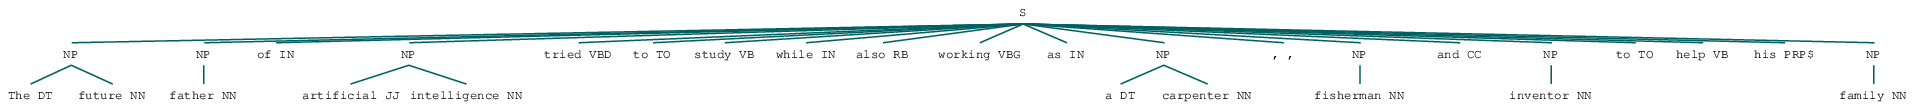

In [44]:
grammer = r'NP: {<DT>?<JJ>*<NN>}'
chunk_parser = nltk.RegexpParser(grammer)
chunk_result = chunk_parser.parse(new_chunk_token)
chunk_result